# Libraries

In [2]:
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

# API Key Generation and API URL Declaration

In [4]:
#API KEY
api_key = "78aac9217e5b16253e383fb61661f079"

#API URL
api_url = "https://api.the-odds-api.com/v4/sports"

#Parameters
params = {"apiKey": api_key}

#Use requests to Query API
response = requests.get(api_url, params=params)

# Connect To API and Display Sports

In [6]:
#Print API Status
if response.status_code == 200:
    sports_list = response.json()
    print("API Connected")
else:
    print("Failed to Connect:", response.status_code)
    sports_list = []

# Prints all available sports and indexes for users to choose from
print("\nAvailable Sports:")
for i, sport in enumerate(sports_list):
    print(f"[{i + 1}] {sport['title']}")

API Connected

Available Sports:
[1] NCAAF
[2] NCAAF Championship Winner
[3] NFL Super Bowl Winner
[4] UFL
[5] AFL
[6] KBO
[7] MiLB
[8] MLB
[9] MLB World Series Winner
[10] NCAA Baseball
[11] NPB
[12] Basketball Euroleague
[13] NBA
[14] Boxing
[15] IPL
[16] Pakistan Super League
[17] Test Matches
[18] PGA Championship Winner
[19] The Open Winner
[20] US Open Winner
[21] AHL
[22] Liiga
[23] NHL
[24] NHL Championship Winner
[25] HockeyAllsvenskan
[26] SHL
[27] NCAA Lacrosse
[28] MMA
[29] US Presidential Elections Winner
[30] NRL
[31] Primera División - Argentina
[32] A-League
[33] Austrian Football Bundesliga
[34] Belgium First Div
[35] Brazil Série A
[36] Brazil Série B
[37] Primera División - Chile
[38] Super League - China
[39] Copa Libertadores
[40] Copa Sudamericana
[41] Denmark Superliga
[42] Championship
[43] League 1
[44] League 2
[45] EPL
[46] FA Cup
[47] FIFA World Cup Winner
[48] Veikkausliiga - Finland
[49] Ligue 1 - France
[50] Ligue 2 - France
[51] Bundesliga - Germany
[52]

# Sport Selection

In [8]:
selected_sport = int(input("\nEnter the number of the sport you want to analyze: ")) - 1
sport_key = sports_list[selected_sport]['key']
print(f"\nYou selected: {sports_list[selected_sport]['title']}")



Enter the number of the sport you want to analyze:  13



You selected: NBA


# Region and Attributes that We are Analyzing

In [58]:
region = "us"
markets = "spreads,h2h,totals"

# Fetching Data for Spreads, Head to Head, and Totals
### These are the Only Free Metrics from our API

In [61]:
url = f"https://api.the-odds-api.com/v4/sports/{sport_key}/odds"
params = {
    "apiKey": api_key,
    "regions": region,
    "markets": markets,
    "oddsFormat": "american"
}
response = requests.get(url, params=params)
data = response.json()


### Fetching All Market Data Within Data

In [64]:
if isinstance(data, list):
    market_types = {
        market["key"]
        for match in data
        for site in match.get("bookmakers", [])
        for market in site.get("markets", [])
    }
    
    if market_types:
        print("Market Types Found in Data")
        print(sorted(market_types))
    else:
        print("No market types found in the data.")
else:
    print("API Error or unexpected response:")
    print(data)


Market Types Found in Data
['h2h', 'spreads', 'totals']


# Raw Data

In [16]:
print("Raw Data\n",data)

Raw Data
 [{'id': '1814ec22a3248bb5467aa1a2bee18f98', 'sport_key': 'basketball_nba', 'sport_title': 'NBA', 'commence_time': '2025-04-22T02:14:01Z', 'home_team': 'Denver Nuggets', 'away_team': 'Los Angeles Clippers', 'bookmakers': [{'key': 'draftkings', 'title': 'DraftKings', 'last_update': '2025-04-22T04:14:25Z', 'markets': [{'key': 'h2h', 'last_update': '2025-04-22T04:14:25Z', 'outcomes': [{'name': 'Denver Nuggets', 'price': -160}, {'name': 'Los Angeles Clippers', 'price': 124}]}, {'key': 'spreads', 'last_update': '2025-04-22T04:14:25Z', 'outcomes': [{'name': 'Denver Nuggets', 'price': -125, 'point': -1.5}, {'name': 'Los Angeles Clippers', 'price': -105, 'point': 1.5}]}, {'key': 'totals', 'last_update': '2025-04-22T04:14:25Z', 'outcomes': [{'name': 'Over', 'price': -110, 'point': 212.5}, {'name': 'Under', 'price': -120, 'point': 212.5}]}]}, {'key': 'bovada', 'title': 'Bovada', 'last_update': '2025-04-22T04:13:20Z', 'markets': [{'key': 'h2h', 'last_update': '2025-04-22T04:13:20Z', 'out

# Data Cleaning

In [18]:
df_clean = []
for match in data:
    game_time = datetime.fromisoformat(match["commence_time"].replace("Z", "+00:00"))
    home = match["home_team"]
    away = match["away_team"]
    for site in match.get("bookmakers", []):
        book = site["title"]
        for market in site.get("markets", []):
            for outcome in market["outcomes"]:
                attributes = {
                    "time": game_time,
                    "home_team": home,
                    "away_team": away,
                    "matchup": f"{away} @ {home}",
                    "market": market["key"],
                    "sportsbook": book,
                    "team": outcome["name"],
                    "odds": outcome["price"]
                }
                if "point" in outcome:
                    attributes["point"] = outcome["point"]
                df_clean.append(attributes)

# Data Entry Statistics

In [20]:
print("Loaded", len(df_clean), "entries")
final= pd.DataFrame(df_clean)
final.head()

Loaded 384 entries


,time,home_team,away_team,matchup,market,sportsbook,team,odds,point
0,2025-04-22 02:14:01+00:00,Denver Nuggets,Los Angeles Clippers,Los Angeles Clippers @ Denver Nuggets,h2h,DraftKings,Denver Nuggets,-160,NaN
1,2025-04-22 02:14:01+00:00,Denver Nuggets,Los Angeles Clippers,Los Angeles Clippers @ Denver Nuggets,h2h,DraftKings,Los Angeles Clippers,124,NaN
2,2025-04-22 02:14:01+00:00,Denver Nuggets,Los Angeles Clippers,Los Angeles Clippers @ Denver Nuggets,spreads,DraftKings,Denver Nuggets,-125,-1.5
3,2025-04-22 02:14:01+00:00,Denver Nuggets,Los Angeles Clippers,Los Angeles Clippers @ Denver Nuggets,spreads,DraftKings,Los Angeles Clippers,-105,1.5
4,2025-04-22 02:14:01+00:00,Denver Nuggets,Los Angeles Clippers,Los Angeles Clippers @ Denver Nuggets,totals,DraftKings,Over,-110,212.5


# Metric Creation


## Different Metrics We Created
###### 1. Win Score: Weights both the Spread as well as Spread Probability equally to predict a Winner
###### 2. Implied Win Probability: Which team is likely to Win According to the Book

##### Creating a Spread Score

In [24]:
spreads = final[final["market"] == "spreads"].copy()
spreads["spread_score"] = -spreads["point"]

##### Spread Odds of Converting

In [80]:
# Step 1: Define the odds converter again (just in case it's not already defined)
def converted_odds(odds):
    return 100 / (odds + 100) if odds > 0 else -odds / (-odds + 100)

# Step 2: Prepare head-to-head (moneyline) data
h2h = final[final['market'] == 'h2h'].copy()
h2h["win_probability"] = h2h["odds"].apply(converted_odds)

# Step 3: Prepare spreads data and make sure win_score is there
spreads = final[final["market"] == "spreads"].copy()
spreads["spread_score"] = -spreads["point"]
spreads["prob"] = spreads["odds"].apply(converted_odds)
spreads["win_score"] = 0.5 * spreads["spread_score"] + 0.5 * spreads["prob"]

# Step 4: Merge h2h and spread data on team name
value_df = h2h.merge(
    spreads[["team", "win_score"]],
    on="team",
    how="left"
)

# Step 5: Calculate value score = model's win_score - book's implied win probability
value_df["value_score"] = value_df["win_score"] - value_df["win_probability"]
# Step 7: Keep only the highest value_score per team
best_value_bets = value_df.loc[
    value_df.groupby("team")["value_score"].idxmax()
].reset_index(drop=True)

# Optional: Filter again for worthwhile moneyline odds (not too heavy favorites)
best_value_bets = best_value_bets[best_value_bets["odds"] > -200]

# Sort by value_score descending
best_value_bets = best_value_bets.sort_values(by="value_score", ascending=False)

# Show top N bets
display(best_value_bets[["team", "odds", "win_probability", "win_score", "value_score"]].head(10))

# # Step 6: Filter and sort to show top value bets (e.g., best 10 underpriced teams)
# # # Optional: filter out heavily favored teams (e.g., odds more negative than -200)
# # filtered_value_df = value_df[value_df["odds"] > -200]

# top_value_bets = filtered_value_df.sort_values(by="value_score", ascending=False).head(100)

# # Display results
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# display(top_value_bets[["team", "odds", "win_probability", "win_score", "value_score"]])


,team,odds,win_probability,win_score,value_score
6,Indiana Pacers,-165,0.622642,2.511905,1.889263
5,Houston Rockets,-142,0.586777,1.763033,1.176256
7,Los Angeles Clippers,124,0.446429,1.527778,1.081349
3,Detroit Pistons,-110,0.523810,1.000000,0.476190
2,Denver Nuggets,-138,0.579832,1.027778,0.447946
13,New York Knicks,-105,0.512195,0.761905,0.249710
4,Golden State Warriors,135,0.425532,-0.988095,-1.413627
11,Milwaukee Bucks,160,0.384615,-1.497525,-1.882140
12,Minnesota Timberwolves,210,0.322581,-2.485849,-2.808430
15,Orlando Magic,550,0.153846,-5.738095,-5.891941


In [26]:
def converted_odds(odds):
    return 100 / (odds + 100) if odds > 0 else -odds / (-odds + 100)

spreads["prob"] = spreads["odds"].apply(converted_odds)

##### Win Score: Creates a Score that Weights the Spread Score and Spread Odds Equally

In [28]:
spreads["win_score"] = 0.5 * spreads["spread_score"] + 0.5 * spreads["prob"]

##### Win Probability Creation

In [30]:
h2h = final[final['market'] == 'h2h'].copy()
h2h["win_probability"] = h2h["odds"].apply(converted_odds)

##### Visualizing Sportsbook Bias Based on Totals

In [32]:
totals = final[final["market"] == "totals"].copy()
totals["probability"] = totals["odds"].apply(converted_odds)

pivot = totals.pivot_table(index=["matchup", "sportsbook", "point"],
                           columns="team", values="probability").reset_index()

pivot["public_bias"] = pivot.get("Over", np.nan) - pivot.get("Under", np.nan)

bias = pivot.dropna(subset=["public_bias"])


In [66]:
value_df = h2h.merge(
    spreads[["team", "win_score"]], 
    on="team", 
    how="left"
)
# Value = Model probability (win_score) - Implied probability from sportsbook
value_df["value_score"] = value_df["win_score"] - value_df["win_probability"]

# Filter top 10 most underpriced teams
top_value_bets = value_df.sort_values(by="value_score", ascending=False).head(10)

# Optional: Only include odds where the payout is worthwhile
top_value_bets = top_value_bets[top_value_bets["odds"] > -200]

# Visualizations

##### Predicting Winners Based off of Win Score 

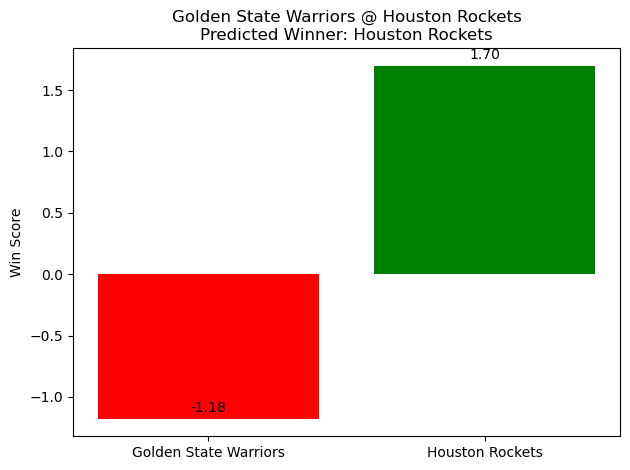

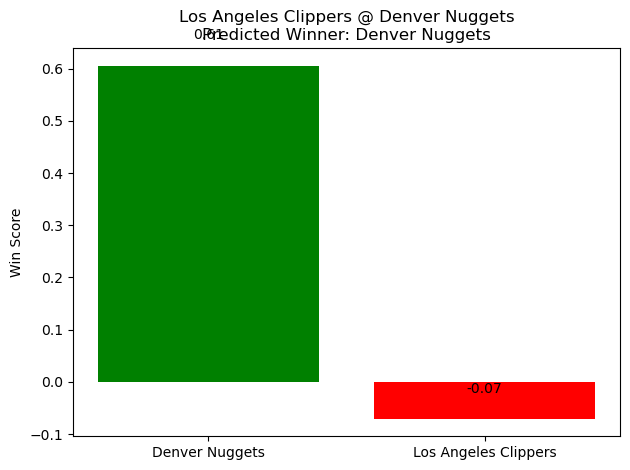

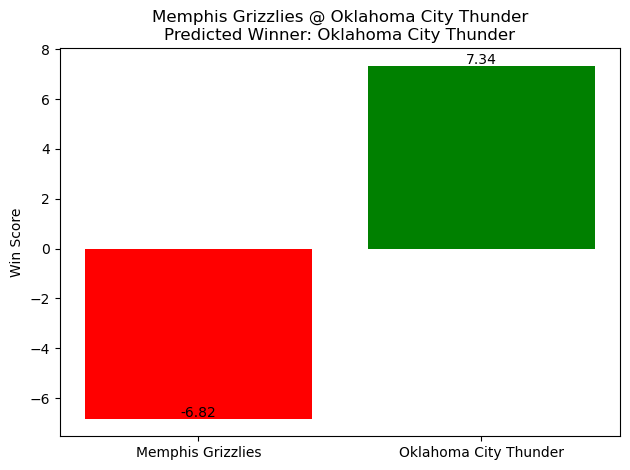

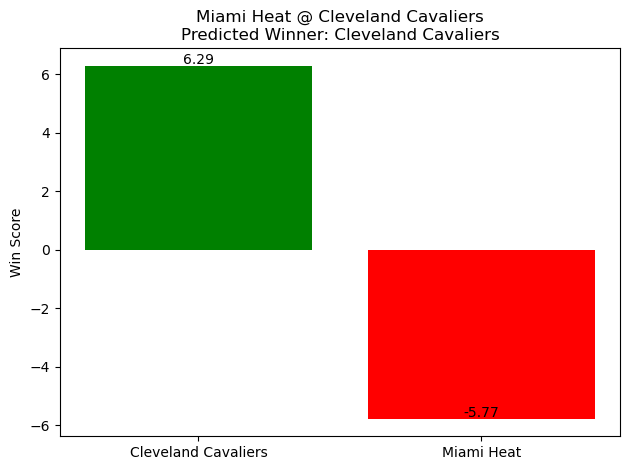

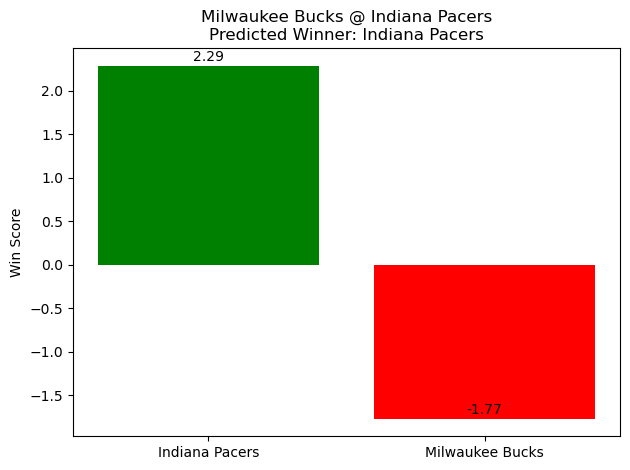

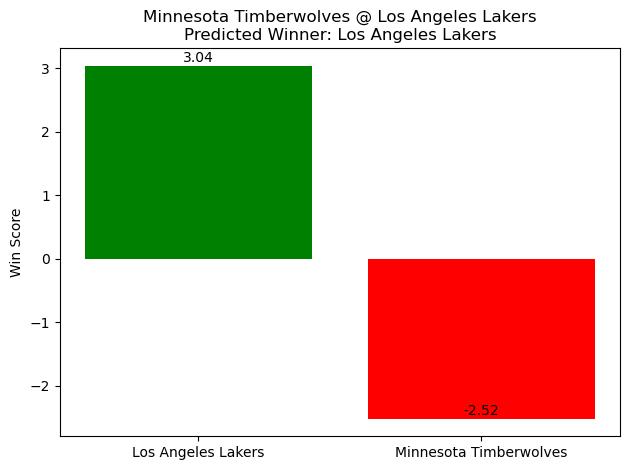

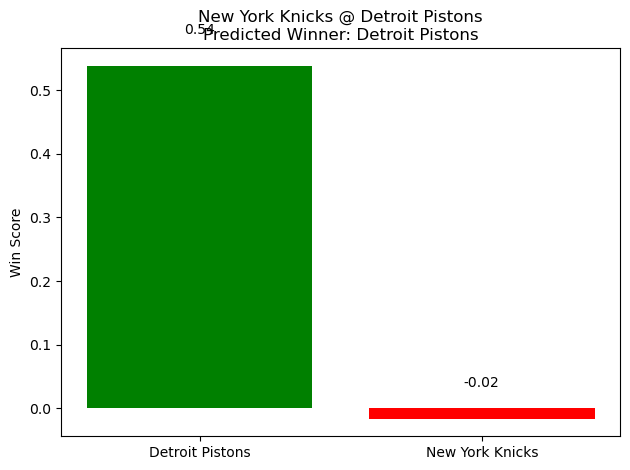

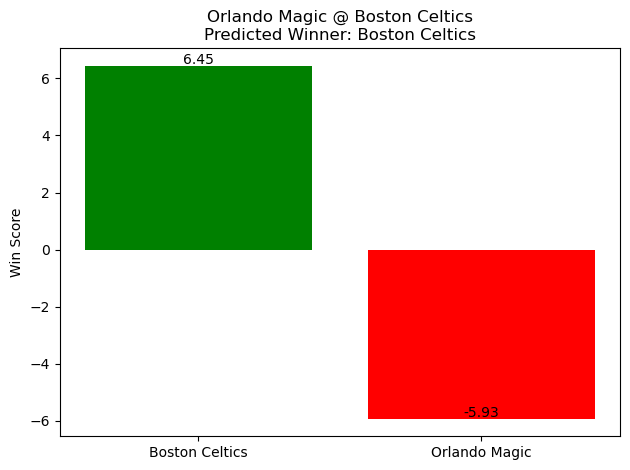

In [35]:

grouped = spreads.groupby(["matchup", "team"]).agg({"win_score": "mean"}).reset_index()

for matchup, metrics in grouped.groupby("matchup"):
    if len(metrics) != 2:
        continue
    teams = metrics["team"].values
    scores = metrics["win_score"].values
    winner = teams[np.argmax(scores)]

    colors = ["red", "red"]
    colors[np.argmax(scores)] = "green"

    x = np.arange(2)
    bars = plt.bar(x, scores, color=colors)
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                 f"{scores[i]:.2f}", ha="center")
    plt.xticks(x, teams)
    plt.title(f"{matchup}\nPredicted Winner: {winner}")
    plt.ylabel("Win Score")
    plt.tight_layout()
    plt.show()


### Predicting Winners based on Win Probability

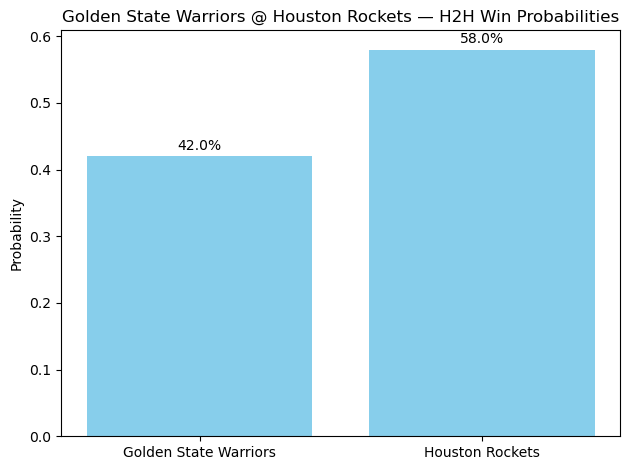

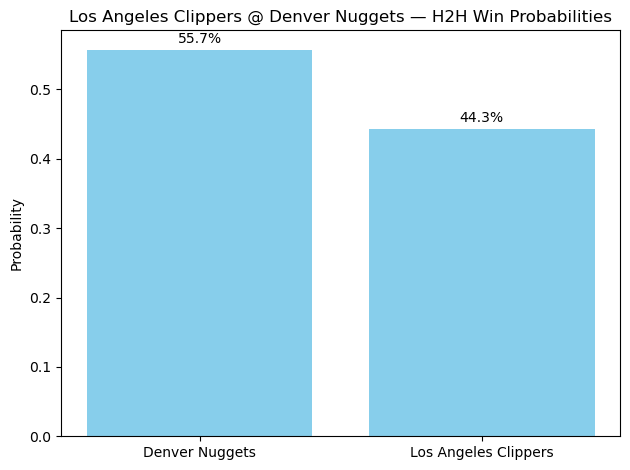

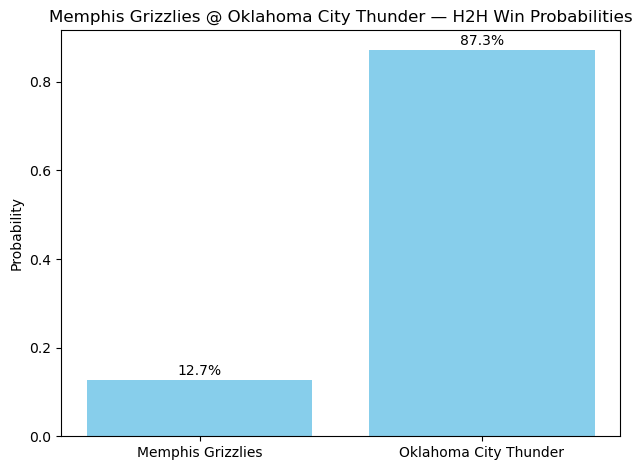

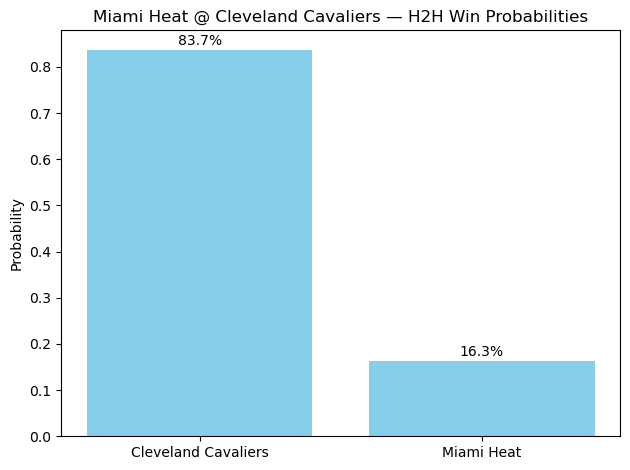

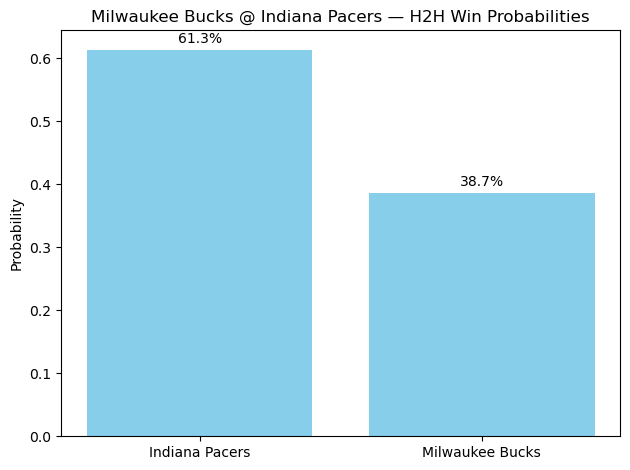

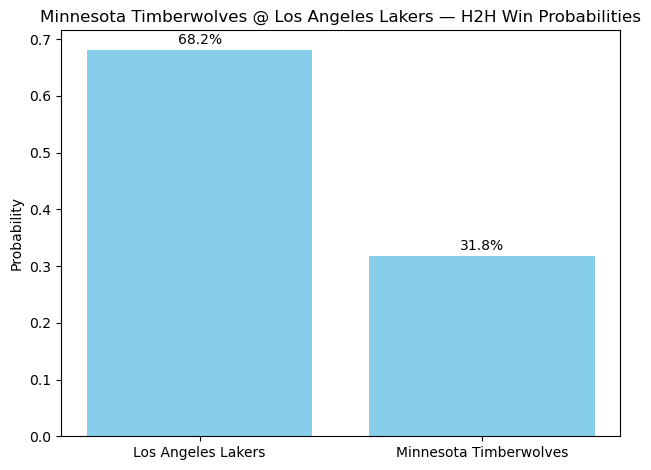

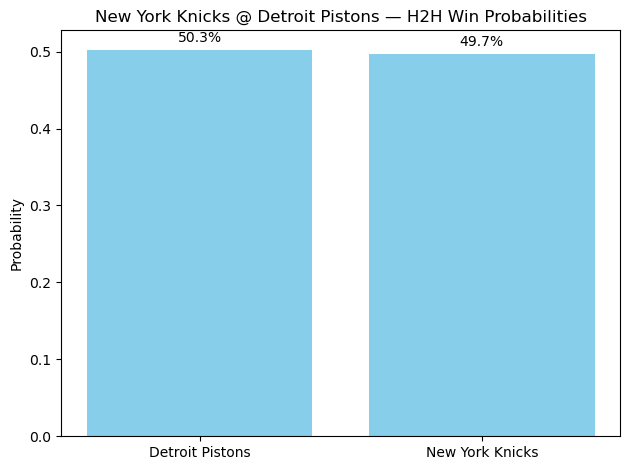

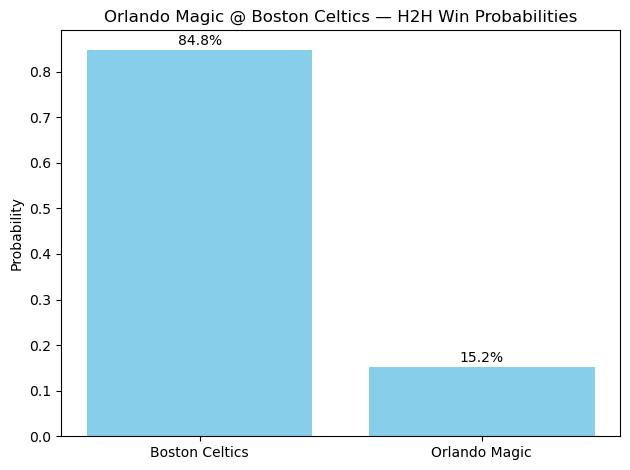

In [37]:
if not h2h.empty:
    h2h_avg = h2h.groupby(["matchup", "team"])["win_probability"].mean().reset_index()
    for matchup, metrics in h2h_avg.groupby("matchup"):
        if len(metrics) != 2:
            continue
        teams = metrics["team"].values
        probs = metrics["win_probability"].values
        probs = probs/ probs.sum()

        x = np.arange(2)
        bars = plt.bar(x, probs, color="skyblue")
        for i, bar in enumerate(bars):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                     f"{probs[i]*100:.1f}%", ha="center")
        plt.xticks(x, teams)
        plt.title(f"{matchup} — H2H Win Probabilities")
        plt.ylabel("Probability")
        plt.tight_layout()
        plt.show()


### Plotting Book Bias

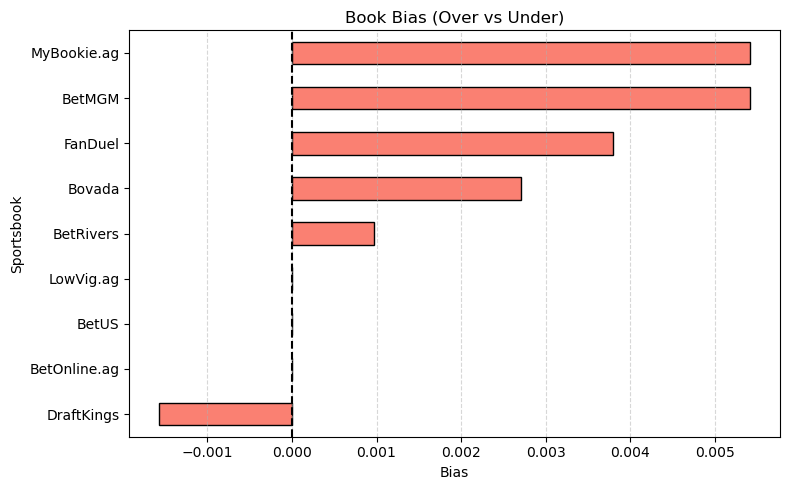

In [39]:
book_bias = bias.groupby("sportsbook")["public_bias"].mean().sort_values()

plt.figure(figsize=(8,5))
book_bias.plot(kind="barh", color="salmon", edgecolor="black")
plt.axvline(0, linestyle="--", color="black")
plt.title("Book Bias (Over vs Under)")
plt.xlabel("Bias")
plt.ylabel("Sportsbook")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()